In [19]:
# Ensure Python sees the project root for module imports
import os, sys
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

The Hull–White short‐rate evolves as

$$
dr(t) \;=\; \lambda\bigl(\theta(t)-r(t)\bigr)\,dt \;+\; \eta\,dW_r^{\mathbb{Q}}(t),
\quad r(0)=r_0,
$$

where:

- $\lambda$ is the mean‐reversion speed,  
- $\theta(t)$ is the time‐dependent long‐term level,  
- $\eta$ is the short‐rate volatility,  
- $W_r^{\mathbb{Q}}(t)$ is a standard Brownian motion under measure $\mathbb{Q}$.

For our prototype notebook, we keep it simple and use Hull-White model with a **constant** long-term $\theta$


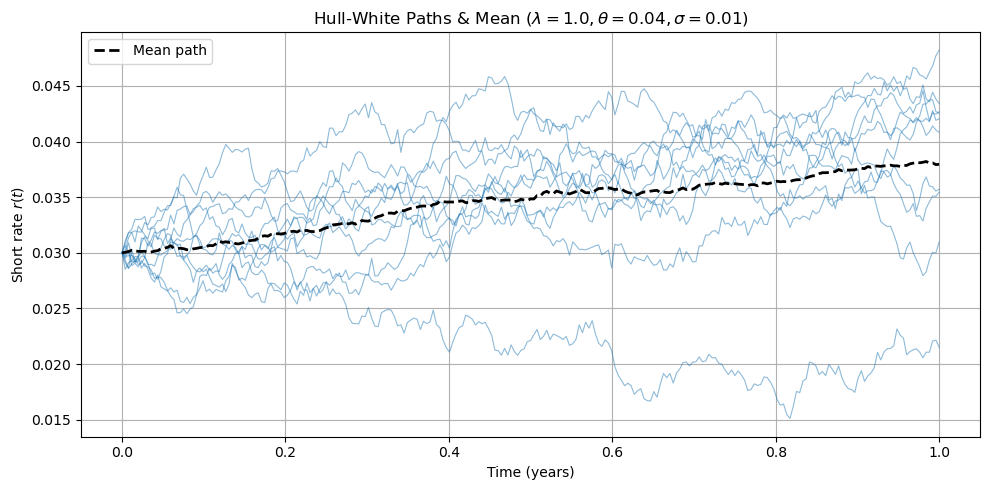

In [21]:
from models.hull_white import HullWhiteModel
import matplotlib.pyplot as plt

# Instantiate and simulate
hw = HullWhiteModel(
    r_0=0.03, lambd=1.0, theta=0.04,
    sigma=0.01, T=1.0, n_steps=252,
    n_paths=50, seed=123
)
paths = hw.generate_paths()
r = paths['r']
time = paths['time']

# Plot individual paths
plt.figure(figsize=(10, 5))
for i in range(min(10, hw.n_paths)):
    plt.plot(time, r[i], lw=0.8, alpha=0.5, color='C0')

# Plot the sample‐mean path
plt.plot(
    time,
    r.mean(axis=0),
    linestyle='--',
    linewidth=2,
    color='k',
    label='Mean path'
)

plt.title(rf"Hull-White Paths & Mean ($\lambda={hw.lambd}, \theta={hw.theta}, \sigma={hw.sigma}$)")
plt.xlabel("Time (years)")
plt.ylabel("Short rate $r(t)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- **Mean Reversion:** 

  All paths start at the initial rate $r(0)=0.03$, then drift back toward the long‑term mean $\theta=0.04$.  
  This demonstrates the OU‑type pull of the term  
  $$\lambda\bigl(\theta - r(t)\bigr)\,. $$

- **Volatility:**  

  With $\eta=0.01$, the one‑step shocks are  
  $$\eta\sqrt{\Delta t}\;\approx\;0.01\sqrt{\tfrac{1}{252}}\;\approx\;0.00063$$  
  i.e. about **6.3 bp**, which matches the early path spread.

- **Dispersion Over Time:**  

  The stationary standard deviation is  
  $$\sqrt{\tfrac{\eta^2}{2\lambda}} \;=\;\tfrac{0.01}{\sqrt{2}}\;\approx\;0.0071$$  
  i.e. about **71 bp**, so by $T=1$ most rates cluster within $\theta\pm1\,SD = 4\%\pm0.71\%$. The range is $[3.29\%,\,4.71\%]$.

- **Practical Implication:**  

  Expressing rate moves in basis points emphasizes how small volatilities translate into economically meaningful shocks,  
  which is crucial for pricing rate‑sensitive derivatives (caps, floors, swaptions) and for XVA discounting.  

## Summary & Next Steps

**What we accomplished**  
- Refactored the Hull–White SDE into a reusable `HullWhiteModel` class in `models/hull_white.py`.  
- Simulated and plotted short‑rate paths under $\mathbb{Q}$ with both individual trajectories and the sample‐mean curve.  
- Verified that the mean path tracks the analytic expectation and that the path dispersion matches the stationary variance (~71 bp).

**Next steps**  
1. **Parity checks:** Insert a cell to confirm Covered Interest Parity for FX simulator and Put–Call Parity for a simple European option.  
2. **Integrate rates into FX:** Extend `FXSimulator` to accept stochastic rate paths (from `HullWhiteModel`) instead of flat $r_{\rm dom},r_{\rm for}$.  
3. **Calibration module:** Begin writing `calibration/curve_fit.py` to fit $\theta(t)$ (and $r(0)$) to a market zero‐coupon curve $P(0,T)$.  
4. **Option pricing:** Create or update `notebooks/03_payoffs.ipynb` to price a European FX call/put via Monte Carlo.